## 1D Convolution

In [29]:
import numpy as np

def MatrixConvolution1D():
    a=np.array([1,3,5,7,6])
    b=np.array([1,2,3])
    m = len(a)
    n = len(b)
    convolution= np.zeros(m+n-1)
    for i in range(1,(m+n-1)+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                #the indexes
        for j in range(max(1,i+1-n),min(i,m)+1): #S={max(1,i+1-n),....,min(i,n)}
            convolution[i-1]=convolution[i-1]+a[j-1]*b[(i-1)-j+1]
    print("Convolution 1D using step by step")
    print(convolution)
    conv = np.convolve(a,b)
    print("Convolution 1D using numpy method")
    print(conv)
MatrixConvolution1D()

Convolution 1D using step by step
[ 1.  5. 14. 26. 35. 33. 18.]
Convolution 1D using numpy method
[ 1  5 14 26 35 33 18]


## 2D Convolution

In [12]:
import numpy as np
import scipy as scp
from scipy import signal

def MatrixConvolution2D(): 
    a=[[1,0,1],[4,3,1],[-1,0,2],[3,0,-7]]
    b=[[1,-1,2,3],[-4,0,1,5],[3,2,-1,0]]
    m1,n1=np.shape(a)
    m2,n2=np.shape(b)
    convolution= np.zeros((m1+m2-1,n1+n2-1))
    for j in range(1,(m1+m2-1)+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                #the indexes
        for k in range(1,(n1+n2-1)+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                #the indexes
            for p in range(max(1,j-m2+1),min(j,m1)+1):#S={max(1,j-m2+1),....,min(j,m1)
                for q in range(max(1,k-n2+1),min(k,n1)+1):#S={max(1,k-n2+1),....,min(k,n1)
                    convolution[j-1][k-1]=convolution[j-1][k-1]+(a[p-1][q-1])*(b[(j-1)-(p)+1][(k-1)-(q)+1])
    print("Convolution 2D using step by step")
    print(convolution)
    conv= signal.convolve2d(a,b,mode='full',boundary='fill',fillvalue=0)
    print("Convolution 2D using scipy method")
    print(conv)

MatrixConvolution2D()

Convolution 2D using step by step
[[  1.  -1.   3.   2.   2.   3.]
 [  0.  -1.   3.  22.  12.   8.]
 [-14.  -9.   2.  20.  19.  11.]
 [ 19.  14.  -5.  10. -13. -11.]
 [-15.  -2.  38.  19.  -9. -35.]
 [  9.   6. -24. -14.   7.   0.]]
Convolution 2D using scipy method
[[  1  -1   3   2   2   3]
 [  0  -1   3  22  12   8]
 [-14  -9   2  20  19  11]
 [ 19  14  -5  10 -13 -11]
 [-15  -2  38  19  -9 -35]
 [  9   6 -24 -14   7   0]]


## Gaussian Filter

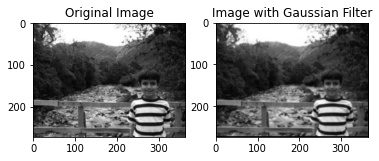

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def Convolution(a,b,type_convolution):
    m1,n1=np.shape(a)
    m2,n2=np.shape(b)
    convolution= np.zeros((m1+m2-1,n1+n2-1))
    if type_convolution=="full":
        for j in range(1,(m1+m2-1)+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
            for k in range(1,(n1+n2-1)+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
                for p in range(max(1,j-m2+1),min(j,m1)+1):#S={max(1,j-m2+1),....,min(j,m1)
                    for q in range(max(1,k-n2+1),min(k,n1)+1):#S={max(1,k-n2+1),....,min(k,n1)
                        convolution[j-1][k-1]=convolution[j-1][k-1]+(a[p-1][q-1])*(b[(j-1)-(p)+1][(k-1)-(q)+1])
    else:
        for j in range(1,m1+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
            for k in range(1,n1+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
                for p in range(max(1,j-m2+1),min(j,m1)+1):#S={max(1,j-m2+1),....,min(j,m1)
                    for q in range(max(1,k-n2+1),min(k,n1)+1):#S={max(1,k-n2+1),....,min(k,n1)
                        convolution[j-1][k-1]=convolution[j-1][k-1]+(a[p-1][q-1])*(b[(j-1)-(p)+1][(k-1)-(q)+1])
    return convolution

def GaussianFilter():
    image=plt.imread('child2.jpg')
    image=image.astype(float)
    image=np.asarray(image)
    image=np.clip(image, 0, 255)
    filterG=(1/16)*np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])
    fig = plt.figure()
    image=image.astype(np.uint8)#image at the moment is
    #an array of type flot and here it becomes type uint8
    #convolution= signal.convolve2d(image,filterG,mode='full',boundary='fill',fillvalue=0)
    convolution=Convolution(image,filterG,"same")
    convolution=np.clip(convolution, 0, 255)
    convolution=convolution.astype(np.uint8)#image at the moment is
    #an array of type flot and here it becomes type uint8
    convolution=np.asarray(convolution)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_title("Original Image")
    ax2.set_title("Image with Gaussian Filter")
    ax1.imshow(image,cmap='gray')
    ax2.imshow(convolution,cmap='gray',vmin=0,vmax=255)
GaussianFilter()

## Sobel Filter

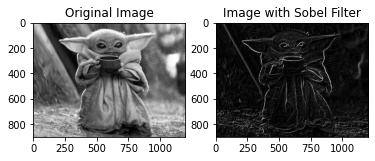

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def Convolution(a,b,type_convolution):
    m1,n1=np.shape(a)
    m2,n2=np.shape(b)
    convolution= np.zeros((m1+m2-1,n1+n2-1))
    if type_convolution=="full":
        for j in range(1,(m1+m2-1)+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
            for k in range(1,(n1+n2-1)+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
                for p in range(max(1,j-m2+1),min(j,m1)+1):#S={max(1,j-m2+1),....,min(j,m1)
                    for q in range(max(1,k-n2+1),min(k,n1)+1):#S={max(1,k-n2+1),....,min(k,n1)
                        convolution[j-1][k-1]=convolution[j-1][k-1]+(a[p-1][q-1])*(b[(j-1)-(p)+1][(k-1)-(q)+1])
    else:
        for j in range(1,m1+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
            for k in range(1,n1+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
                for p in range(max(1,j-m2+1),min(j,m1)+1):#S={max(1,j-m2+1),....,min(j,m1)
                    for q in range(max(1,k-n2+1),min(k,n1)+1):#S={max(1,k-n2+1),....,min(k,n1)
                        convolution[j-1][k-1]=convolution[j-1][k-1]+(a[p-1][q-1])*(b[(j-1)-(p)+1][(k-1)-(q)+1])
    return convolution

def SobelFilter():
    image=plt.imread('baby_yoda.jpg')
    image=image.astype(float)
    image=np.asarray(image)
    image=np.clip(image, 0, 255)
    #filterS=np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    filterBx=np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    filterBy=np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    fig = plt.figure()
    image=image.astype(np.uint8)#image at the moment is
    #an array of type flot and here it becomes type uint8
    #Cx= signal.convolve2d(image,filterBx,mode='full',boundary='fill',fillvalue=0)
    #Cy= signal.convolve2d(image,filterBy,mode='full',boundary='fill',fillvalue=0)
    Cx=Convolution(image,filterBx,"same")
    Cy=Convolution(image,filterBy,"same")
    Cx=np.clip(Cx, 0, 255)
    #an array of type flot and here it becomes type uint8
    Cy=np.clip(Cy, 0, 255)
    #an array of type flot and here it becomes type uint8
    C=np.sqrt(Cx**2+Cy**2)
    C=np.asarray(C)
    C=C.astype(np.uint8)
    #an array of type flot and here it becomes type uint8
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_title("Original Image")
    ax2.set_title("Image with Sobel Filter")
    ax1.imshow(image,cmap='gray')
    ax2.imshow(C,cmap='gray',vmin=0,vmax=255)
SobelFilter()

## Emphasize edges

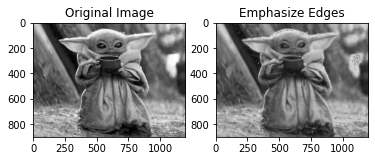

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def Convolution(a,b,type_convolution):
    m1,n1=np.shape(a)
    m2,n2=np.shape(b)
    if type_convolution=="full":
        convolution= np.zeros((m1+m2-1,n1+n2-1))
        for j in range(1,(m1+m2-1)+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
            for k in range(1,(n1+n2-1)+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
                for p in range(max(1,j-m2+1),min(j,m1)+1):#S={max(1,j-m2+1),....,min(j,m1)
                    for q in range(max(1,k-n2+1),min(k,n1)+1):#S={max(1,k-n2+1),....,min(k,n1)
                        convolution[j-1][k-1]=convolution[j-1][k-1]+(a[p-1][q-1])*(b[(j-1)-(p)+1][(k-1)-(q)+1])
    else:
        convolution= np.zeros((m1,n1))
        for j in range(1,m1+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
            for k in range(1,n1+1):#Starts in 1 because that is the way the method works, so, is necesary to adjust 
                                    #the indexes
                for p in range(max(1,j-m2+1),min(j,m1)+1):#S={max(1,j-m2+1),....,min(j,m1)
                    for q in range(max(1,k-n2+1),min(k,n1)+1):#S={max(1,k-n2+1),....,min(k,n1)
                        convolution[j-1][k-1]=convolution[j-1][k-1]+(a[p-1][q-1])*(b[(j-1)-(p)+1][(k-1)-(q)+1])
    return convolution

def EmphasizeEdges():
    image=plt.imread('baby_yoda.jpg')
    image=image.astype(float)
    image=np.asarray(image)
    image=np.clip(image, 0, 255)
    filterEE=np.array([[1, 1, 1],[1, -8, 1],[1, 1, 1]])
    fig = plt.figure()
    image=image.astype(np.uint8)#image at the moment is
    #an array of type flot and here it becomes type uint8
    #convolution= signal.convolve2d(image,filterG,mode='full',boundary='fill',fillvalue=0)
    convolution=Convolution(image,filterEE,"same")
    c=1
    D=image+c*convolution;
    D=np.asarray(D)
    D=D.astype(np.uint8)#image at the moment is
    #an array of type flot and here it becomes type uint8
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_title("Original Image")
    ax2.set_title("Emphasize Edges")
    ax1.imshow(image,cmap='gray')
    ax2.imshow(D,cmap='gray')
EmphasizeEdges()

## DFT-2D

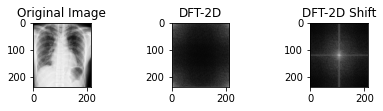

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def im2double(image):
    number_decimals=7
    info=np.iinfo(image.dtype)
    out=image.astype(float) / info.max
    out=out.round(number_decimals)
    return out

def DFT2D():
    image=plt.imread('chest.jpg')
    image_copy=image
    image=np.asarray(image)
    image=im2double(image)
    DFT2D=np.fft.fft2(image)
    DFT2D_Shift=np.fft.fftshift(DFT2D)
    result_DFT2D=np.log(1+np.abs(DFT2D))
    result_DFT2DShift=np.log(1+np.abs(DFT2D_Shift))
    fig = plt.figure()
    ax1 = fig.add_subplot(1,5,1)
    ax2 = fig.add_subplot(1,5,3)
    ax3 = fig.add_subplot(1,5,5)
    ax1.set_title("Original Image")
    ax2.set_title("DFT-2D")
    ax3.set_title("DFT-2D Shift")
    ax1.imshow(image_copy,cmap='gray')
    ax2.imshow(result_DFT2D,cmap='gray',vmin=0,vmax=10)
    ax3.imshow(result_DFT2DShift,cmap='gray',vmin=0,vmax=10)
DFT2D()

## Gaussian Filter DFT-2D

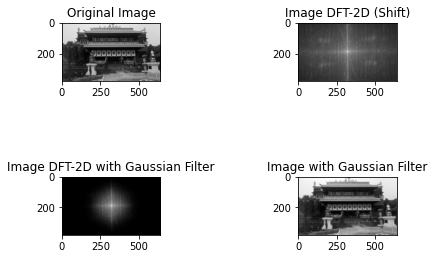

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def im2double(image):
    number_decimals=7
    info=np.iinfo(image.dtype) 
    out=image.astype(float) / info.max
    out=out.round(number_decimals)
    return out

def GaussianFilterDFT2D():
    image=plt.imread('edificio_china.jpg')
    image_copy=image
    m,n=np.shape(image)

    image = im2double(image)

    #Calculation of DFT-2D
    
    F = np.fft.fft2(image)
    F_shift = np.fft.fftshift(F)

    #Calculate the Gaussian Filter
    D = np.zeros((m,n))
    for i in range(1,m+1):
        for j in range(1,n+1):
            D[i-1,j-1] = np.sqrt(i**2+j**2)

    H = np.zeros((m,n))
    sigma = 50
    for i in range(1,m+1):
        for j in range(1,n+1):
            H[i-1,j-1] = np.exp(-(D[i-1][j-1])**2 / (2 * sigma**2))
            
    index1=int(np.floor(m/2))
    index2=int(np.floor(n/2))

    HSI = H[:index1, :index2]

    HSD = np.transpose(np.rot90(HSI,1))
    HID = np.rot90(HSI,2)
    HII = np.transpose(np.rot90(HSI,3))
    
    m1, n1 = np.shape(HSI)
    H[0:m1, n-n1:n] = HSD
    H[m-m1:m+1, n-n1:n] = HID
    H[m-m1:m+1, 0:n1] = HII
    
    H = np.asarray(H)
    F = np.asarray(F)

    #Apply the filter
    H_shift = np.fft.fftshift(H)
    DFT2_filt = F*H
    FM_shift =  np.fft.fftshift(DFT2_filt)

    #Filtered Image
    I_new = np.abs(np.fft.ifft2(DFT2_filt));
    
    result_F=np.log(1+np.abs(F_shift))
    result_FM=np.log(1+np.abs(FM_shift))
    
    fig = plt.figure()
    ax1 = fig.add_subplot(3,3,1)
    ax2 = fig.add_subplot(3,3,3)
    ax3 = fig.add_subplot(3,3,7)
    ax4 = fig.add_subplot(3,3,9)
    ax1.set_title("Original Image")
    ax2.set_title("Image DFT-2D (Shift)")
    ax3.set_title("Image DFT-2D with Gaussian Filter")
    ax4.set_title("Image with Gaussian Filter")
    ax1.imshow(image_copy,cmap='gray')
    ax2.imshow(result_F,cmap='gray',vmin=0,vmax=10)
    ax3.imshow(result_FM,cmap='gray',vmin=0,vmax=10)
    ax4.imshow(I_new,cmap='gray') 
GaussianFilterDFT2D()